In [1]:
#import numpy as np
#import pandas as pd
#df = pd.read_csv ("eco2mix.csv", sep=";", index_col=0)
#df.info()
#df.head(50)

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('eco2mix-regional-cons-def.csv', sep = ';')
#df.info()

In [3]:
def get_values(columns):
    for column in columns:
        # Percentage of missing values
        percentage = (df[column].isna().sum() * 100) / len(df)
        # Categorical / Quantitative 
        no_categories = len(df[column].unique())
        if no_categories <= 2:
            cat_class = 'Categorical - Binary'
            #print(df[element].unique())
        elif no_categories <= 5:
            cat_class = 'Categorical - 3 to 5 categories'
        elif no_categories <= 10:
            cat_class = 'Categorical - 6 to 10 categories'
        elif no_categories <= 50:
            cat_class = 'Categorical - more than 10 categories'
        else:
            cat_class = 'Quantitative'
        # Distribution
        if no_categories <= 12:
            print(column, df[column].unique())
        else:
            print('-')
            
        #print(cat_class)
        #print(column, no_categories)
        #print(column, round(percentage, 2).astype(str), '%')        
        #print(round(percentage, 2).astype(str))
        #print(no_categories)


get_values(df.columns)

Code INSEE région [28 27 53 11 32 75 84 52 24 44 76 93]
Région ['Normandie' 'Bourgogne-Franche-Comté' 'Bretagne' 'Île-de-France'
 'Hauts-de-France' 'Nouvelle-Aquitaine' 'Auvergne-Rhône-Alpes'
 'Pays de la Loire' 'Centre-Val de Loire' 'Grand Est' 'Occitanie'
 "Provence-Alpes-Côte d'Azur"]
Nature ['Données définitives' 'Données consolidées']
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
Column 30 [nan]


In [4]:
print(len(df) - df.isna().sum())

Code INSEE région      1980288
Région                 1980288
Nature                 1980288
Date                   1980288
Heure                  1980288
Date - Heure           1980288
Consommation (MW)      1980276
Thermique (MW)         1980276
Nucléaire (MW)         1155161
Eolien (MW)            1980180
Solaire (MW)           1980276
Hydraulique (MW)       1980276
Pompage (MW)           1120121
Bioénergies (MW)       1980276
Ech. physiques (MW)    1843380
Stockage batterie       279360
Déstockage batterie     244224
Eolien terrestre        244224
Eolien offshore         142464
TCO Thermique (%)       508032
TCH Thermique (%)       508032
TCO Nucléaire (%)       398112
TCH Nucléaire (%)       398112
TCO Eolien (%)          508032
TCH Eolien (%)          508032
TCO Solaire (%)         508032
TCH Solaire (%)         508032
TCO Hydraulique (%)     263808
TCH Hydraulique (%)     263808
TCO Bioénergies (%)     263808
TCH Bioénergies (%)     263808
Column 30                    0
dtype: i

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
start_date = pd.to_datetime("2021-07-01")
end_date = pd.to_datetime("2022-06-30")
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
filtered_df.head()

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30
1787328,53,Bretagne,Données consolidées,2021-07-01,00:00,2021-07-01T00:00:00+02:00,2479.0,6.0,NaN,7.0,...,0.0,0.16,1.45,2.10,66.67,NaN,NaN,NaN,NaN,NaN
1787329,27,Bourgogne-Franche-Comté,Données consolidées,2021-07-01,00:00,2021-07-01T00:00:00+02:00,1987.0,24.0,NaN,70.0,...,0.0,4.68,17.78,2.57,65.38,NaN,NaN,NaN,NaN,NaN
1787330,11,Île-de-France,Données consolidées,2021-07-01,00:00,2021-07-01T00:00:00+02:00,6381.0,0.0,NaN,0.0,...,0.0,0.14,45.00,2.49,49.69,NaN,NaN,NaN,NaN,NaN
1787331,28,Normandie,Données consolidées,2021-07-01,00:00,2021-07-01T00:00:00+02:00,2816.0,195.0,7509.0,17.0,...,0.0,0.43,40.00,2.88,55.48,NaN,NaN,NaN,NaN,NaN
1787332,93,Provence-Alpes-Côte d'Azur,Données consolidées,2021-07-01,00:00,2021-07-01T00:00:00+02:00,4252.0,358.0,NaN,37.0,...,0.0,23.31,30.28,1.74,24.50,NaN,NaN,NaN,NaN,NaN


# Questions
* What to do with nans? - Andreas
* Which new variables should be created?
* Do we need every variable (especially with nans)?
* Which Timeframe should we use for analysis? 07/2021 - 06/2022 - reasons for it - Aras
* What is our perspective of analyzing the data? What is the interesting question?
* Tasks of Manon:
** plots of the target variable - What is the target variable? - Consumption of electrical energy
** plot of the consumption and the total production
** plot of the consumption depending on the temporality (year/month/day)
** plot of the consumption depending on the location (maybe do a map with the library Geopandas ?)
** plot of the production by type of production (pieplot ?)
** multivariate plot (correlation map)
** any other ideas to describe well the data

In [6]:
# What to do with nans?
df.isna().sum()

Code INSEE région            0
Région                       0
Nature                       0
Date                         0
Heure                        0
Date - Heure                 0
Consommation (MW)           12
Thermique (MW)              12
Nucléaire (MW)          825127
Eolien (MW)                108
Solaire (MW)                12
Hydraulique (MW)            12
Pompage (MW)            860167
Bioénergies (MW)            12
Ech. physiques (MW)     136908
Stockage batterie      1700928
Déstockage batterie    1736064
Eolien terrestre       1736064
Eolien offshore        1837824
TCO Thermique (%)      1472256
TCH Thermique (%)      1472256
TCO Nucléaire (%)      1582176
TCH Nucléaire (%)      1582176
TCO Eolien (%)         1472256
TCH Eolien (%)         1472256
TCO Solaire (%)        1472256
TCH Solaire (%)        1472256
TCO Hydraulique (%)    1716480
TCH Hydraulique (%)    1716480
TCO Bioénergies (%)    1716480
TCH Bioénergies (%)    1716480
Column 30              1980288
dtype: i

In [7]:
# Consommation (MW), Thermique (MW), Solaire (MW), Hydraulique (MW), Bioénergies (MW)
df.columns
df.sort_values(['Consommation (MW)'], ascending = True).tail(20)
# All nans are from 2013-01-01. They are not analyzed if we concentrate on records from 2021-07-01 to 2022-06-30

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30
9679,11,Île-de-France,Données définitives,2013-01-17,19:00,2013-01-17T19:00:00+01:00,15196.0,2207.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10267,11,Île-de-France,Données définitives,2013-01-18,19:30,2013-01-18T19:30:00+01:00,15202.0,2296.0,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854670,11,Île-de-France,Données définitives,2017-01-23,19:00,2017-01-23T19:00:00+01:00,15205.0,1821.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9692,11,Île-de-France,Données définitives,2013-01-17,19:30,2013-01-17T19:30:00+01:00,15221.0,2102.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854685,11,Île-de-France,Données définitives,2017-01-23,19:30,2017-01-23T19:30:00+01:00,15250.0,1788.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1085084,11,Île-de-France,Données définitives,2018-02-27,19:30,2018-02-27T19:30:00+01:00,15263.0,1935.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10258,11,Île-de-France,Données définitives,2013-01-18,19:00,2013-01-18T19:00:00+01:00,15286.0,2376.0,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1085655,11,Île-de-France,Données définitives,2018-02-28,19:30,2018-02-28T19:30:00+01:00,15338.0,1995.0,NaN,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,28,Normandie,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Nucléaire (MW)
# Cut the right dataframe for nan analysis
df_project = df.loc[df['Date'] >= '2021-07-01']
df_project
print(df_project.loc[df['Nucléaire (MW)'].isna()]['Région'].unique())
# There are null values in only 5 regions
df_project.loc[(df_project.apply(lambda x: x['Région'] in ['Bretagne', 'Bourgogne-Franche-Comté', 'Île-de-France', "Provence-Alpes-Côte d'Azur", 'Pays de la Loire'], axis=1)) & (df['Nucléaire (MW)'].notnull())]
# There is not a single value for nuclear energy in these regions. It can be assumed that no nuclear power plant is available there
# the nan values can be set to 0

['Bretagne' 'Bourgogne-Franche-Comté' 'Île-de-France'
 "Provence-Alpes-Côte d'Azur" 'Pays de la Loire']


,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30


In [9]:
# Pompage (MW)
print(df_project.loc[df['Pompage (MW)'].isna()]['Région'].unique())
# There are null values in only 5 regions but not the same as in nuclear energy
# It can be assumed that no pump power station is available there
# the nan values can be set to 0

['Île-de-France' 'Normandie' 'Pays de la Loire' 'Nouvelle-Aquitaine'
 'Centre-Val de Loire']


In [10]:
df_project.isna().sum()

Code INSEE région           0
Région                      0
Nature                      0
Date                        0
Heure                       0
Date - Heure                0
Consommation (MW)           0
Thermique (MW)              0
Nucléaire (MW)          80400
Eolien (MW)                 0
Solaire (MW)                0
Hydraulique (MW)            0
Pompage (MW)            80400
Bioénergies (MW)            0
Ech. physiques (MW)     93456
Stockage batterie       17856
Déstockage batterie     52992
Eolien terrestre        52992
Eolien offshore        111312
TCO Thermique (%)           0
TCH Thermique (%)           0
TCO Nucléaire (%)       22080
TCH Nucléaire (%)       22080
TCO Eolien (%)              0
TCH Eolien (%)              0
TCO Solaire (%)             0
TCH Solaire (%)             0
TCO Hydraulique (%)    139968
TCH Hydraulique (%)    139968
TCO Bioénergies (%)    139968
TCH Bioénergies (%)    139968
Column 30              192960
dtype: int64

In [11]:
# Setting NaN Values to 0 in 5 regions which does not have Nuclear.
regions_nuc = ['Bretagne', 'Bourgogne-Franche-Comté', 'Île-de-France', "Provence-Alpes-Côte d'Azur", 'Pays de la Loire']
df_project.loc[df_project['Région'].isin(regions_nuc), 'Nucléaire (MW)'] = df_project.loc[df_project['Région'].isin(regions_nuc), 'Nucléaire (MW)'].fillna(0)
df_project.isna().sum()

Code INSEE région           0
Région                      0
Nature                      0
Date                        0
Heure                       0
Date - Heure                0
Consommation (MW)           0
Thermique (MW)              0
Nucléaire (MW)              0
Eolien (MW)                 0
Solaire (MW)                0
Hydraulique (MW)            0
Pompage (MW)            80400
Bioénergies (MW)            0
Ech. physiques (MW)     93456
Stockage batterie       17856
Déstockage batterie     52992
Eolien terrestre        52992
Eolien offshore        111312
TCO Thermique (%)           0
TCH Thermique (%)           0
TCO Nucléaire (%)       22080
TCH Nucléaire (%)       22080
TCO Eolien (%)              0
TCH Eolien (%)              0
TCO Solaire (%)             0
TCH Solaire (%)             0
TCO Hydraulique (%)    139968
TCH Hydraulique (%)    139968
TCO Bioénergies (%)    139968
TCH Bioénergies (%)    139968
Column 30              192960
dtype: int64

In [12]:
# Setting NaN Values to 0 in 5 regions which does not have Pompage.
regions_pom = ['Île-de-France', 'Normandie', 'Pays de la Loire', 'Centre-Val de Loire', 'Nouvelle-Aquitaine']  
df_project.loc[df_project['Région'].isin(regions_pom), 'Pompage (MW)'] = df_project.loc[df_project['Région'].isin(regions_pom), 'Pompage (MW)'].fillna(0)
df_project.isna().sum()


Code INSEE région           0
Région                      0
Nature                      0
Date                        0
Heure                       0
Date - Heure                0
Consommation (MW)           0
Thermique (MW)              0
Nucléaire (MW)              0
Eolien (MW)                 0
Solaire (MW)                0
Hydraulique (MW)            0
Pompage (MW)                0
Bioénergies (MW)            0
Ech. physiques (MW)     93456
Stockage batterie       17856
Déstockage batterie     52992
Eolien terrestre        52992
Eolien offshore        111312
TCO Thermique (%)           0
TCH Thermique (%)           0
TCO Nucléaire (%)       22080
TCH Nucléaire (%)       22080
TCO Eolien (%)              0
TCH Eolien (%)              0
TCO Solaire (%)             0
TCH Solaire (%)             0
TCO Hydraulique (%)    139968
TCH Hydraulique (%)    139968
TCO Bioénergies (%)    139968
TCH Bioénergies (%)    139968
Column 30              192960
dtype: int64

In [13]:
# Adding the "Total Production" column
df_project.loc[:, 'Total Production'] = df_project['Thermique (MW)'] + df_project['Nucléaire (MW)'] + df_project['Eolien (MW)'] + df_project['Solaire (MW)'] + df_project['Hydraulique (MW)'] + df_project['Pompage (MW)'] + df_project['Bioénergies (MW)'] + df_project['Ech. physiques (MW)']

# Adding the "Green Production" column
df_project.loc[:, 'Green Production'] = df_project.loc[:, 'Total Production'] - df_project.loc[:, 'Nucléaire (MW)']

# Convert "Date - Heure" column to datetime
df_project["Date - Heure"] = pd.to_datetime(df_project["Date - Heure"])

df_project.info()


C:\Users\Andreas\AppData\Local\Temp\ipykernel_41580\941739168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project.loc[:, 'Total Production'] = df_project['Thermique (MW)'] + df_project['Nucléaire (MW)'] + df_project['Eolien (MW)'] + df_project['Solaire (MW)'] + df_project['Hydraulique (MW)'] + df_project['Pompage (MW)'] + df_project['Bioénergies (MW)'] + df_project['Ech. physiques (MW)']
C:\Users\Andreas\AppData\Local\Temp\ipykernel_41580\941739168.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192960 entries, 1787328 to 1980287
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Code INSEE région    192960 non-null  int64         
 1   Région               192960 non-null  object        
 2   Nature               192960 non-null  object        
 3   Date                 192960 non-null  datetime64[ns]
 4   Heure                192960 non-null  object        
 5   Date - Heure         192960 non-null  object        
 6   Consommation (MW)    192960 non-null  float64       
 7   Thermique (MW)       192960 non-null  float64       
 8   Nucléaire (MW)       192960 non-null  float64       
 9   Eolien (MW)          192960 non-null  float64       
 10  Solaire (MW)         192960 non-null  float64       
 11  Hydraulique (MW)     192960 non-null  float64       
 12  Pompage (MW)         192960 non-null  float64       
 13  Bioéner

C:\Users\Andreas\AppData\Local\Temp\ipykernel_41580\941739168.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project["Date - Heure"] = pd.to_datetime(df_project["Date - Heure"])


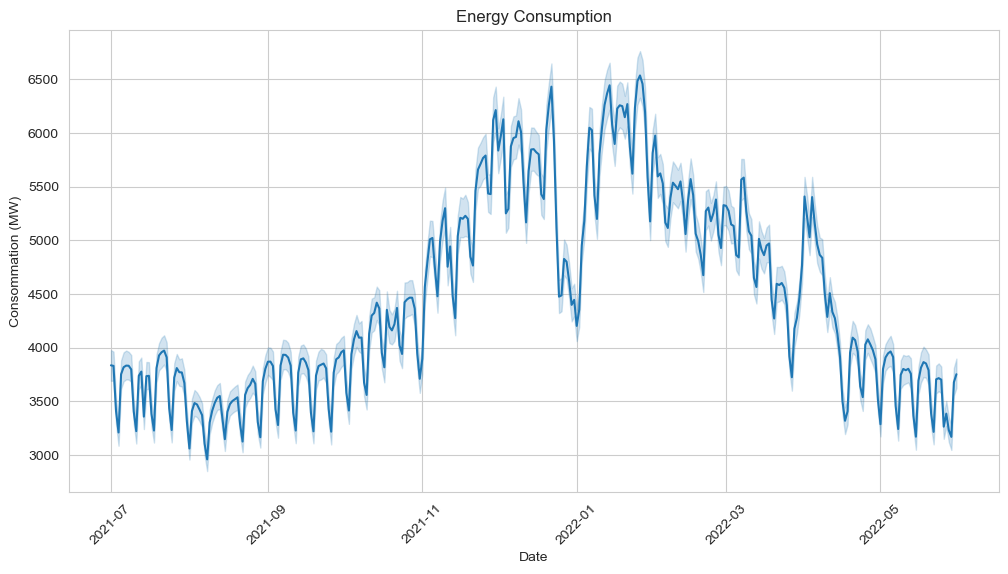

In [14]:
# Plotting the Consommation (MW)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline



sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="Date", y="Consommation (MW)", data=df_project)
plt.title("Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Consommation (MW)")
plt.xticks(rotation=45)
plt.show()

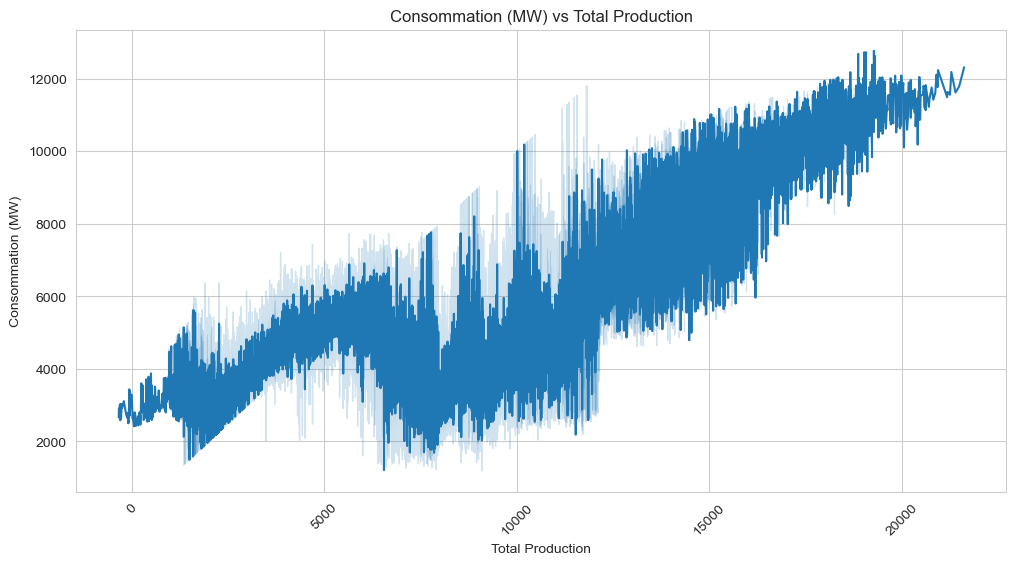

In [12]:
# Plotting the Consommation (MW) vs Total Production
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="Total Production", y="Consommation (MW)", data = df_project)
plt.title("Consommation (MW) vs Total Production")
plt.xlabel("Total Production")
plt.ylabel("Consommation (MW)")
plt.xticks(rotation=45)
plt.show()

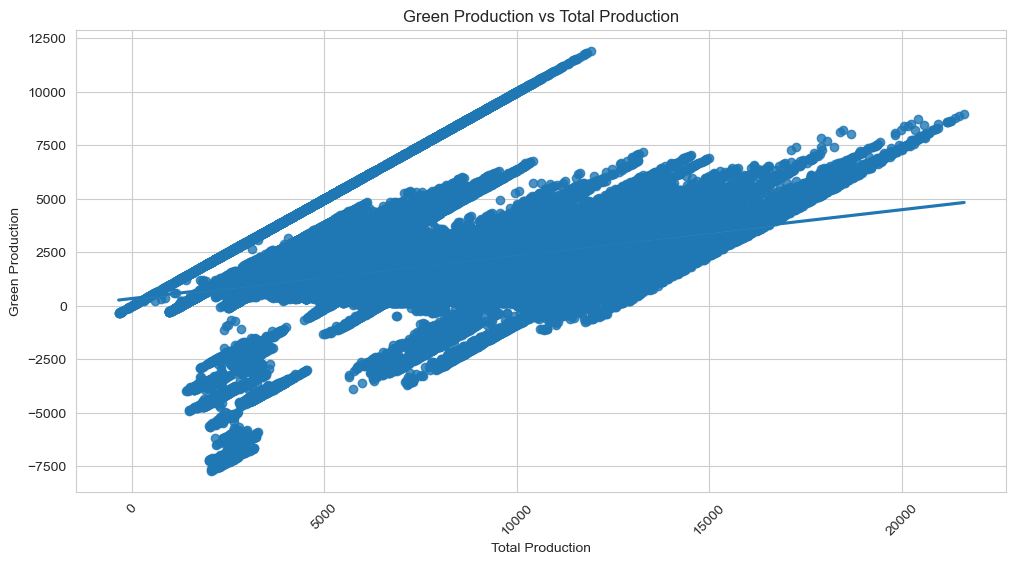

In [13]:
# Plotting the Green Production vs Total Production
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.regplot(x="Total Production", y="Green Production", data = df_project)
plt.title("Green Production vs Total Production")
plt.xlabel("Total Production")
plt.ylabel("Green Production")
plt.xticks(rotation=45)
plt.show()

C:\Users\Andreas\AppData\Local\Temp\ipykernel_41580\695846907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project['Date - Heure'] = pd.to_datetime(df_project['Date - Heure'], utc=True)
C:\Users\Andreas\AppData\Local\Temp\ipykernel_41580\695846907.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project['Year'] = df_project['Date - Heure'].dt.year
C:\Users\Andreas\AppData\Local\Temp\ipykernel_41580\695846907.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

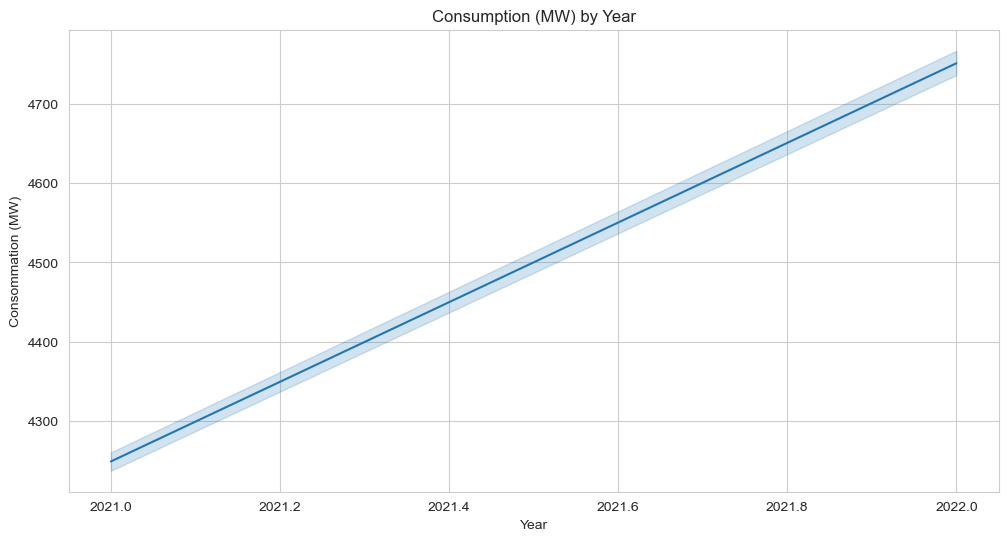

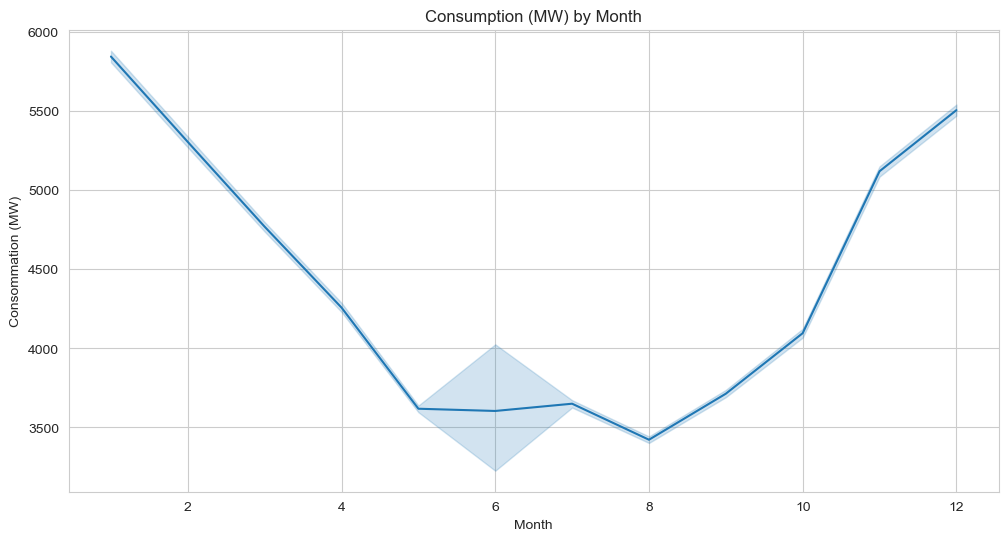

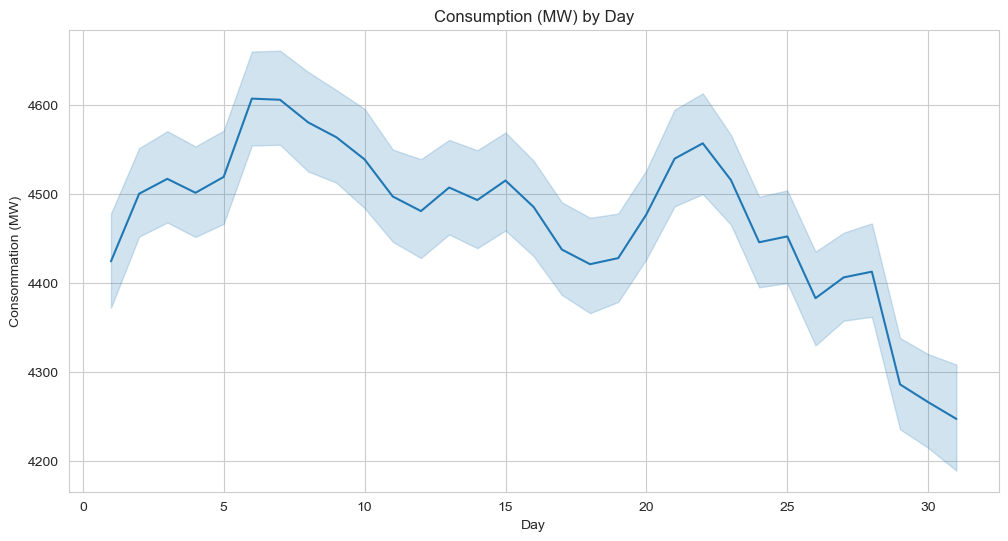

In [15]:
# Convert "Date - Heure" column to datetime with timezone
df_project['Date - Heure'] = pd.to_datetime(df_project['Date - Heure'], utc=True)

# Create year, month, and day variables from the "Date - Heure"
df_project['Year'] = df_project['Date - Heure'].dt.year
df_project['Month'] = df_project['Date - Heure'].dt.month
df_project['Day'] = df_project['Date - Heure'].dt.day

# 'Consommation (MW)' based on year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_project, x='Year', y='Consommation (MW)')
plt.title('Consumption (MW) by Year')
plt.xlabel('Year')
plt.ylabel('Consommation (MW)')
plt.show()

# 'Consommation (MW)' based on month
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_project, x='Month', y='Consommation (MW)')
plt.title('Consumption (MW) by Month')
plt.xlabel('Month')
plt.ylabel('Consommation (MW)')
plt.show()

# 'Consommation (MW)' based on day
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_project, x='Day', y='Consommation (MW)')
plt.title('Consumption (MW) by Day')
plt.xlabel('Day')
plt.ylabel('Consommation (MW)')
plt.show()

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import GeoJSONDataSource
# Read the France shapefile or GeoJSON file
gdf_france = gpd.read_file("/Users/Philosophie/Desktop/dat/France_shapefile/")

# Convert GeoDataFrame to GeoJSONDataSource
gdf_json = gdf_france.to_crs('EPSG:4326')
geojson = gdf_json.to_json()
geosource = GeoJSONDataSource(geojson=geojson)

# Initialize a Bokeh figure
p = figure()

# Plot the GeoJSONDataSource
p.patches('xs', 'ys', source=geosource, fill_color='blue', line_color='black')

# Show the plot
output_notebook()
show(p)


# Now you can work with the GeoDataFrame
# visualize the map
gdf_france.plot()

# access the attribute data
print(gdf_france.head())

ModuleNotFoundError: No module named 'geopandas'

In [36]:
# We need variables for total production and green production with more values
df_project['Total_production_repl (MW)'] = (df_project['Thermique (MW)'].fillna(0) +
                                       df_project['Nucléaire (MW)'].fillna(0) +
                                       df_project['Eolien (MW)'].fillna(0) +
                                       df_project['Solaire (MW)'].fillna(0) +
                                       df_project['Hydraulique (MW)'].fillna(0) +
                                       df_project['Pompage (MW)'].fillna(0) +
                                       df_project['Bioénergies (MW)'].fillna(0) +
                                       df_project['Ech. physiques (MW)'].fillna(0))

df_project['Green Production_repl (MW)'] = df_project['Total_production_repl (MW)'] - df_project['Nucléaire (MW)'].fillna(0)

#df_project.info()

# Pearson test (numerical variables on both sides)
# H0: The production is correlated to the consumption
# H1: The production is not correlated to the consumption

from scipy.stats import pearsonr

result1 = pearsonr(x = df_project['Total_production_repl (MW)'], y = df_project['Consommation (MW)']) 
p_value1 = result1[1]
coefficient1 = result1[0]
print('The p-value is', p_value1, 'and this is smaller then alpa = 0.05. We conclude H0 and reject H1')
print('For all regions there is a correlation between production and consumption')
print('--------------------------------------------------------------------')

# Test can be made with various regions and power sources

def get_correlation(regions):
    alpha = 0.05
    
    for region in regions:
        df_temp = df_project.loc[df_project.Région == region]
        
        print('H0 : For region', region, 'The production is correlated to the consumption')
        print('H1 : For region', region, 'The production is not correlated to the consumption')
        
        coefficient, p_value = pearsonr(x = df_temp['Total_production_repl (MW)'], y = df_temp['Consommation (MW)'])
        
        if p_value < alpha:
            print('The p value', p_value, 'is smaller than alpha, we reject H0 and conclude H1')
            print('For region', region, 'there is a correlation between production and consumption')
        else:
            print('The p value', p_value, 'is bigger than alpha, we conclude H0 and reject H1')
            print('For region', region, 'there is no correlation between production and consumption')
        print('--------------------------------------------------------------------')


get_correlation(df_project.Région.unique())

C:\Users\Andreas\AppData\Local\Temp\ipykernel_41580\4238386270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project['Total_production_repl (MW)'] = (df_project['Thermique (MW)'].fillna(0) +
C:\Users\Andreas\AppData\Local\Temp\ipykernel_41580\4238386270.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project['Green Production_repl (MW)'] = df_project['Total_production_repl (MW)'] - df_project['Nucléaire (MW)'].fillna(0)


The p-value is 0.0 and this is smaller then alpa = 0.05. We conclude H0 and reject H1
For all regions there is a correlation between production and consumption
--------------------------------------------------------------------
H0 : For region Bretagne The production is correlated to the consumption
H1 : For region Bretagne The production is not correlated to the consumption
The p value 0.0 is smaller than alpha, we reject H0 and conclude H1
For region Bretagne there is a correlation between production and consumption
--------------------------------------------------------------------
H0 : For region Bourgogne-Franche-Comté The production is correlated to the consumption
H1 : For region Bourgogne-Franche-Comté The production is not correlated to the consumption
The p value 3.4844102073825767e-233 is smaller than alpha, we reject H0 and conclude H1
For region Bourgogne-Franche-Comté there is a correlation between production and consumption
---------------------------------------------

In [58]:
# ANOVA test (categorical to numeral variables)
# H0: The consumption is correlated to the region
# H1: The consumption is not correlated to the region
# Test can be made with various power sources

import statsmodels.api 

def get_correlation2(power_sources):
    for source in power_sources:
        
        print('H0 : For power-source', source, 'The production is correlated to the region')
        print('H1 : For power-source', source, 'The production is not correlated to the region')
        
        print(source)
        
        #coefficient, p_value = pearsonr(x = df_temp['Total_production_repl (MW)'], y = df_temp['Consommation (MW)'])
        
        result2 = statsmodels.formula.api.ols(source + ' ~ Région', data = df_project).fit()
        #table2 = statsmodels.api.stats.anova_lm(result2)
        #table2

get_correlation2(df_project.columns[7:15])

# H0: The production is correlated to the month
# H1: The production is not correlated to the month
# Test can be made with various regions and power sources

def get_correlation3(regions):
    alpha = 0.05
    for region in regions:
        df_temp = df_project.loc[df_project.Région == region]
        
        


get_correlation3(df_project.Région.unique())

H0 : For power-source Thermique (MW) The production is correlated to the region
H1 : For power-source Thermique (MW) The production is not correlated to the region
Thermique (MW)


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U9')) -> None

In [ ]:
# Merge spatial information dataframe into df